In [ ]:
import numpy as np
import cv2
import math
from google.colab.patches import cv2_imshow
from scipy import ndimage as nd
from matplotlib import pyplot as plt

# Load the image in greyscale
img = np.float64(cv2.imread('Giraffe.jpg',0))
imgcopy=img/255.0

In [ ]:
def LoG(segma):
  global imgcopy
  # kernelWidth=2*math.ceil(3*segma)+1
  # kernel=(kernelWidth,kernelWidth)
  # # Apply Gaussian Blur
  # blur = cv2.GaussianBlur(img,kernel,0)
  # kernelWidth=min(kernelWidth,31)
  # # Apply Laplacian operator in some higher datatype
  # laplacian = cv2.Laplacian(blur,cv2.CV_64F,ksize=kernelWidth)
  segma=float(segma)
  LOG=nd.gaussian_laplace(imgcopy,segma)
  LOG=np.abs(LOG*(segma**2))
  return LOG

In [ ]:
def drawCircle(img,center,radius):
  # newImg=np.zeros((np.size(img,0),np.size(img,1),3))
  # newImg[:,:,0]=img
  # newImg[:,:,1]=img
  # newImg[:,:,2]=img
  image = cv2.circle(img, center,int(radius* (2**0.5)) , 255, 1)
  return image
# cv2_imshow(drawCircle(img,(30,30), 20))
# cv2_imshow(img)

In [ ]:


# gc.collect()
images=[LoG(i) for i in range(1,21)]
def problem1(thresh):
  global images
  centers={}
  for segma in range(1,19):
    for i in range(1,np.size(images[0],0)-1):
      for j in range(1,np.size(images[0],1)-1):
        upper=images[segma-1][i-1:i+2,j-1:j+2]

        mid=images[segma][i-1:i+2,j-1:j+2]

        lower=images[segma+1][i-1:i+2,j-1:j+2]
        
        if mid[1,1]>thresh and mid[1,1]==np.max([upper,mid,lower]):
          center = (j,i)
          if not (segma in centers):
            centers[segma]=[]
          centers[segma].append(center)
  newImg=np.copy(img)
  for segma in centers:
    for center in centers[segma]:
      newImg=drawCircle(newImg,center,segma)
  return newImg,centers
# cv2_imshow(img)

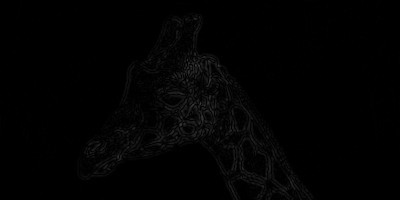

True

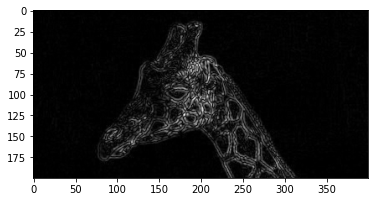

In [ ]:
ans=LoG(1)*255.0
cv2_imshow(ans)
plt.imshow(ans,cmap='gray')
cv2.imwrite('Giraffe_S1.jpg',ans)

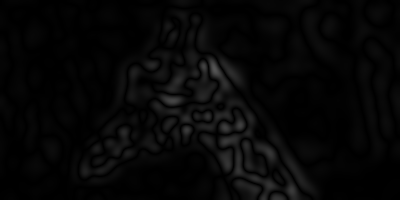

True

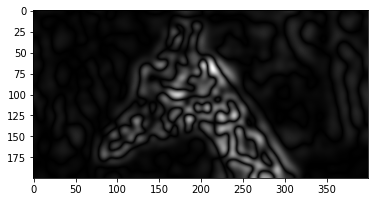

In [ ]:
ans=LoG(5)*255.0
cv2_imshow(ans)
plt.imshow(ans,cmap='gray')
cv2.imwrite('Giraffe_S5.jpg',ans)

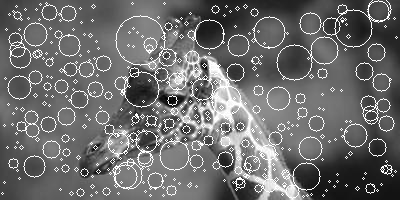

True

In [ ]:
ans = problem1(0)[0]
cv2_imshow(ans)
cv2.imwrite('Giraffe_0.jpg',ans)

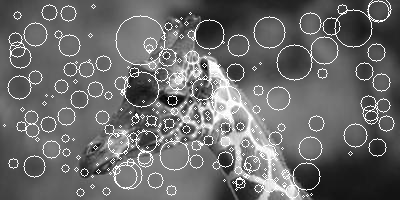

True

In [ ]:
ans = problem1(0.01)[0]
cv2_imshow(ans)
cv2.imwrite('Giraffe_01.jpg',ans)

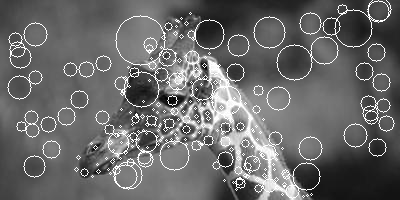

True

In [ ]:
ans = problem1(0.02)[0]
cv2_imshow(ans)
cv2.imwrite('Giraffe_02.jpg',ans)

**Problem 2**
Defining the blobs

In [ ]:
img = np.float64(cv2.imread('Louvre1.jpg',0))
imgcopy=img/255.0
images=[LoG(i) for i in range(1,21)]

outImg,centers1=problem1(0.02)
img1=imgcopy
images1=images
# cv2_imshow(outImg)

In [ ]:
img = np.float64(cv2.imread('Louvre2.jpg',0))
imgcopy=img/255.0
images=[LoG(i) for i in range(1,21)]

outImg,centers2=problem1(0.02)
img2=imgcopy
images2=images
# cv2_imshow(outImg)

In [ ]:
def getBlobFeatureForSegma(imgSegms,centersSegma,segma):
  kernelWidth=2*math.ceil(3*segma)+1
  kernel=(kernelWidth,kernelWidth)
  imgSegms = cv2.GaussianBlur(imgSegms,kernel,0)
  x_axis = nd.prewitt(imgSegms, axis=0)
  y_axis = nd.prewitt(imgSegms, axis=1)
  gradiant = np.arctan(  np.nan_to_num(  y_axis/x_axis  )  )+np.pi/2.0
  # print(np.min(gradiant),np.max(gradiant))
  # temp=np.floor(gradiant*7/np.pi)
  # print(np.min(temp),np.max(temp))
  # print(np.unique(temp))
  # return
  out={}
  for y,x in centersSegma:
    neighborhood=gradiant[x-8:x+8,y-8:y+8] #16x16
    # neighborhood = np.reshape(neighborhood,(1,256)) #16x16 to 1D vector 1x(16*16)
    # neighborhoodVector=np.zeros((16,8))
    neighborhoodVector=[]

    # neighborhoodVector=[0]*8
    # sq=np.int32(np.floor(neighborhood*(7/np.pi)))
    # for i in range(len(neighborhood)):
    #   for j in range(len(neighborhood[0])):
    #     neighborhoodVector[sq[i,j]]+=1

    for i in range(0,16,4):
      for j in range(0,16,4):
        # 0-p/8,p/8-p/4
        bin = [0]*8
        # 4x4 square
        sq=neighborhood[i:i+4,j:j+4]
        sq=np.int32(np.floor(sq*(7/np.pi)+0.5))  # getting the indecies of belonging bin
        # print(np.shape(sq))
        for k in range(len(sq)):
          for l in range(len(sq[0])):
            bin[sq[k,l]]+=1 #increase the index
        neighborhoodVector+=bin

    out[(x,y,segma)]=neighborhoodVector
  return out
        
def getBlobsFeatures(images,centers):
  out={}
  for segma in centers:
    #appending the dictionaries together
    # print(segma)
    out= {**out,**getBlobFeatureForSegma(images[segma],centers[segma],segma)}
    # out=getBlobFeatureForSegma(images[segma],centers[segma])
    # return out
  return out
# plt.imshow(np.arctan(division),cmap="gray")
# blobs1=getBlobsFeatures(images1,centers1)

In [ ]:
#Eculedian correlation
def correlation(blob1,blob2):
  Sum=0
  for i in range(min(len(blob1),len(blob2))):
    Sum+= (blob1[i]-blob2[i])**2
  return Sum**0.5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


24.434782608695652 192.9855072463768


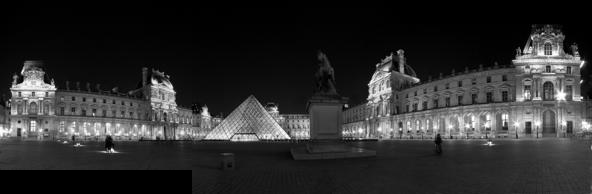

True

In [ ]:
blobs1=getBlobsFeatures(images1,centers1)
blobs2=getBlobsFeatures(images2,centers2)
div=len(blobs1)
div2=len(blobs2)
averageX=0
averageY=0
p1=0
p2=0
s1,s2=10,10
num=[]
counter=0
for x1,y1,segma1 in blobs1:
  bestSoFar=1e9,0,0
  index=0,0
  p1=y1,x1
  s1=segma1
  for x2,y2,segma2 in blobs2:
    num=blobs1[(x1,y1,segma1)],blobs2[(x2,y2,segma2)]
    # curr=np.sum( (np.array(num[0])-np.array(num[1]))**2 )**0.5 
    curr = correlation(num[0],num[1])
    # + (segma2-segma1)**0
    # curr=correlation(blobs1[(x1,y1)],blobs2[x2,y2])
    if curr<bestSoFar[0] and curr<15:
      p2=y2,x2
      s2=segma2
      bestSoFar=curr, x1-x2, y1-y2
      # index=x1,y1
      index=x2,y2,segma2
      # print(curr)
      # print(num[0])
      # print(num[1])
  if index != (0,0):
    counter+=1
    del blobs2[index]
  averageX+=bestSoFar[1]
  averageY+=bestSoFar[2]
  # if counter==1:
  #   break


averageX/=(counter-1)
averageY/=(counter-1)
img_1=drawCircle(np.copy(img1),p1,s2)
img_2=drawCircle(np.copy(img2),p2,s1)
# cv2_imshow(img_1*255)
# cv2_imshow(img_2*255)


print(averageX,averageY)
averageX,averageY=int(averageX),int(averageY)
# averageX,averageY=23,204
length,width = np.shape(img_1)
stitchedImage=np.zeros( (length+averageX,width+averageY) )
stitchedImage[0:length,0:width]=img1*255
stitchedImage[averageX:length+averageX,averageY:width+averageY]=img2*255
ans=stitchedImage
cv2_imshow(ans)
cv2.imwrite('Louvre_All.jpg',ans)
